In [14]:
path_name = directory_name + '\\21-3-19_glass40X'
move_j_by = (0, 0, 0, 1, 1, 1, 1, 0, -2, 0,  0,  0,  0, -1, -2, -3, -4, -5)
move_k_by = (0, 0, 1, 1, 2, 3, 4, 5,  4, 4,  4,  5,  5,  5,  6,  6,  6,  6)
np.savez(path_name + '\\move_by_values', move_j_by=move_j_by, move_k_by=move_k_by)

In [ ]:
move_j_by:
[0, 0, 1, 1, 1, 1,  1, 0, -1, -4, 4, 0, -2, -2, -3, -3, -4, -5, -5, -5, -6, -6, -6, -6, -6, -4, -7, 6, -1, -5, -3, -3, -2, -2, -1, -1, 0]
move_k_by:
[0, 0, 1, 2, 3, 4, -3, 1,  1,  6, 5, 6,  6,  6,  6,  6,  6,  6,  5,  5,  4,  3,  4,  4,  5,  9, -3, 0, -1, -1, -1, -1,  0,  0,  0,  0, 1]
# for 11_2

In [ ]:
move_j_by:
[0, 1, 1, 1, 3, 0, -2, 6,   5, -4, -1, -2, -2, -3, -3, -4, -4, -4, -5, -5, -5, -6, -3, -5, -8, -7, 1, -8, -5, -4, -4, -3, -2, -1, -1, 0, 1]
move_k_by:
[0, 0, 1, 2, 3, 1,  0, 7, -10,  6,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  5,  5,  4,  6, -1,  3, 6,  4,  2,  1,  0,  0,  1,  1,  1, 2, 2]
# for 11_3

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from glob import glob
from os.path import join
from skimage.feature import peak_local_max, canny
from skimage.draw import circle, circle_perimeter

%matplotlib notebook

directory_name = r"C:\Users\Sumita\Documents\Research\Microspheres\birefringent measurements\sphere images"
directory_name = directory_name + r'\2019-05-09'

pixels_per_micron = 748.356 / 210.

folder_name_list = ['alumina_birefringence',                   # 0
                    'corpuscular_silica_15um_birefringence',   # 1
                    'corpuscular_silica_15um_birefringence_2', # 2
                    'gadi_vaterite_birefringence',             # 3
                    'gadi_vaterite_birefringence_2',           # 4
                    'german_11um_vaterite_birefringence',      # 5
                    'german_11um_vaterite_birefringence_2',    # 6
                    'german_11um_vaterite_birefringence_3',    # 7
                    'german_22um_silica_birefringence',        # 8
                    'german_8um_vaterite_birefringence',       # 9
                    'german_8um_vaterite_birefringence_2']    # 10

In [158]:
folder_name = directory_name + '\\' + folder_name_list[7]

npzfile = np.load(folder_name + '\\image_stack.npz')
image_stack = npzfile['image_stack']
degrees = npzfile['degrees']

In [159]:
np.max(image_stack)

255.0

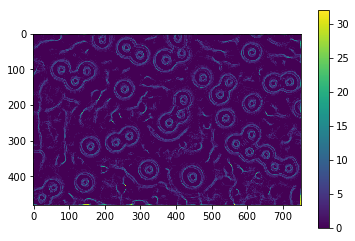

In [160]:
n, nj, nk = image_stack.shape

edges_stack = np.zeros((n, nj, nk))

for i in range(n):
    edges_stack[i] = canny(image_stack[i], sigma=8) # , sigma=3, low_threshold=9, high_threshold=10

plt.figure()
plt.imshow(np.sum(edges_stack, axis=0))
plt.colorbar()
plt.show()

In [ ]:
for e in edges_stack:
    plt.figure()
    plt.imshow(e)
    plt.show()

In [99]:
start_j = 140; end_j = 210; reduced_nj = end_j - start_j
start_k = 170; end_k = 240; reduced_nk = end_k - start_k

In [161]:
f = np.load(folder_name + '\\single_sphere_coords.npz')
start_j = f['start_j']; end_j = f['end_j']; reduced_nj = end_j - start_j
start_k = f['start_k']; end_k = f['end_k']; reduced_nk = end_k - start_k

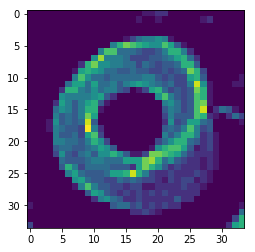

In [162]:
cropped_edge_array = edges_stack[:, start_j:end_j, start_k:end_k]

plt.figure()
plt.imshow(np.sum(cropped_edge_array, axis=0))
plt.show()

In [9]:
np.array(range(n))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [234]:
indexes__ = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
move_j_by = [ 0,  1,  1,  1,  1,  0,  0, -1, -1, -1, -1, -2, -2, -3, -3, -4, -4, -4, -5, -5, -5, -6, -6, -7, -7, -7, -7, -6, -5, -4, -4, -3, -2, -1, -1,  0,  1]
move_k_by = [ 0,  0,  1,  2,  2,  2,  2,  2,  2,  3,  4,  5,  5,  5,  6,  6,  6,  6,  6,  6,  5,  5,  4,  3,  2,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,  2,  2]
# for 11_3
new_cropped_edge_array = cropped_edge_array.copy()

for i in indexes__[1:]:
    new_cropped_edge_array[i] = np.roll(new_cropped_edge_array[i], move_j_by[i], axis=0)
    new_cropped_edge_array[i] = np.roll(new_cropped_edge_array[i], move_k_by[i], axis=1)

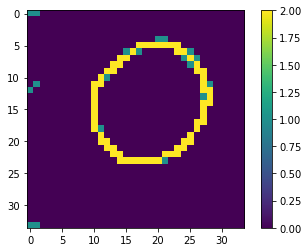

In [243]:
i = 36

plt.figure()
plt.imshow(np.sum(new_cropped_edge_array[:i + 1:i], axis=0))
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


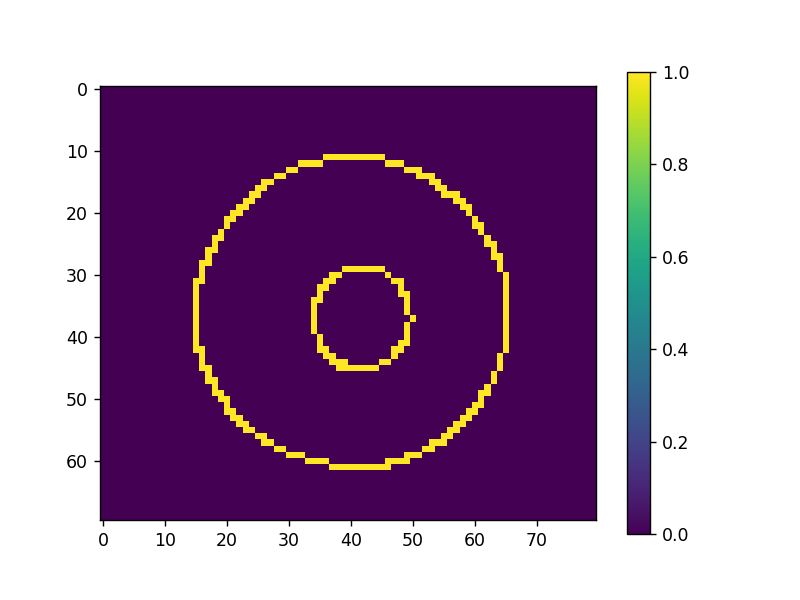

In [146]:
plt.figure()
plt.imshow(new_cropped_edge_array[-1])
plt.colorbar()
plt.show()

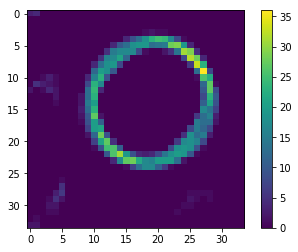

In [244]:
plt.figure()
plt.imshow(np.sum(new_cropped_edge_array[:], axis=0))
plt.colorbar()
plt.show()

In [7]:
degrees

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170])

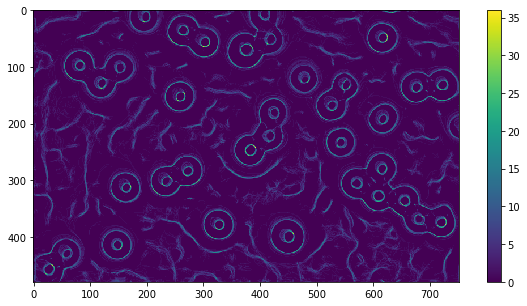

In [245]:
new_edge_array = edges_stack.copy()

for i in indexes__:
    new_edge_array[i] = np.roll(new_edge_array[i], move_j_by[i], axis=0)
    new_edge_array[i] = np.roll(new_edge_array[i], move_k_by[i], axis=1)

plt.figure(figsize=(10,5))
plt.imshow(np.sum(new_edge_array, axis=0))
plt.colorbar()
plt.show()

In [246]:
%matplotlib inline

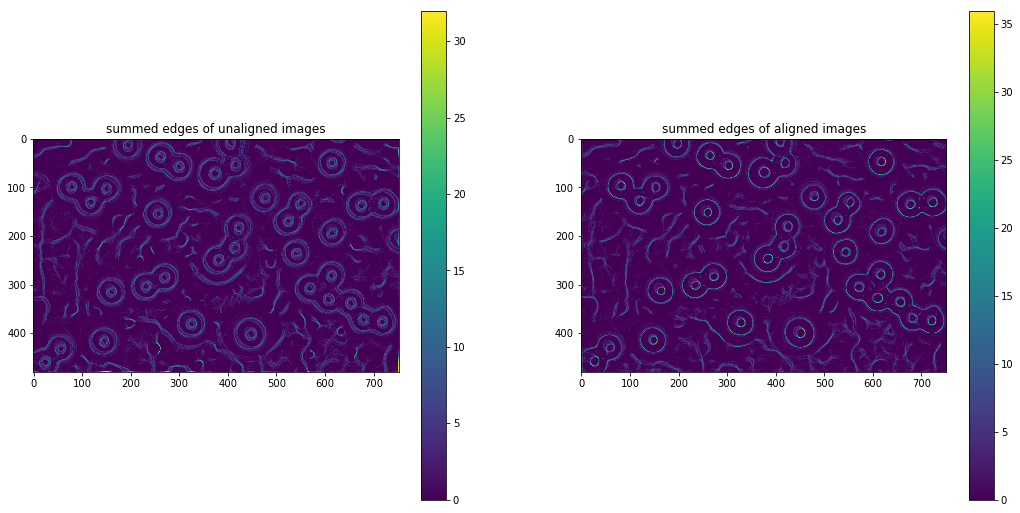

In [247]:
plt.figure(figsize=(18,9))

# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 9))

plt.subplot(1, 2, 1)

plt.imshow(np.sum(edges_stack, axis=0))
plt.colorbar()
plt.title('summed edges of unaligned images')

plt.subplot(1, 2, 2)

plt.imshow(np.sum(new_edge_array, axis=0))
plt.colorbar()
plt.title('summed edges of aligned images')

plt.show()

In [248]:
aligned_image_stack = np.zeros(image_stack.shape)
brightness_list = np.zeros(n)

for i in range(n):
    curr_im = image_stack[i].copy()
    curr_im = np.roll(curr_im, int(move_j_by[i]), axis=0)
    curr_im = np.roll(curr_im, int(move_k_by[i]), axis=1)
    
    aligned_image_stack[i] = curr_im
    brightness_list[i] = np.median(curr_im)

# aligned_image_stack = aligned_image_stack[:, 6:-6, 6:-6]

In [249]:
brightest_index = np.argmax(brightness_list)
shift_angle_by = degrees[brightest_index]
degrees = (degrees - shift_angle_by) % 360.

degrees = np.roll(degrees, -brightest_index, axis=0)
brightness_list = np.roll(brightness_list, -brightest_index, axis=0)
aligned_image_stack = np.roll(aligned_image_stack, -brightest_index, axis=0)

radians = degrees * np.pi / 180.

np.savez(folder_name + '\\aligned_image_stack', image_stack=aligned_image_stack, degrees=degrees, radians=radians)

In [250]:
np.savez(folder_name + '\\move_by_values', move_j_by=move_j_by, move_k_by=move_k_by)

In [251]:
degrees

array([   0.,   10.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,
         80.,   90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,
        170.,  180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,
        260.,  270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.])

In [252]:
radians

array([ 0.        ,  0.17453293,  0.17453293,  0.34906585,  0.52359878,
        0.6981317 ,  0.87266463,  1.04719755,  1.22173048,  1.3962634 ,
        1.57079633,  1.74532925,  1.91986218,  2.0943951 ,  2.26892803,
        2.44346095,  2.61799388,  2.7925268 ,  2.96705973,  3.14159265,
        3.31612558,  3.4906585 ,  3.66519143,  3.83972435,  4.01425728,
        4.1887902 ,  4.36332313,  4.53785606,  4.71238898,  4.88692191,
        5.06145483,  5.23598776,  5.41052068,  5.58505361,  5.75958653,
        5.93411946,  6.10865238])

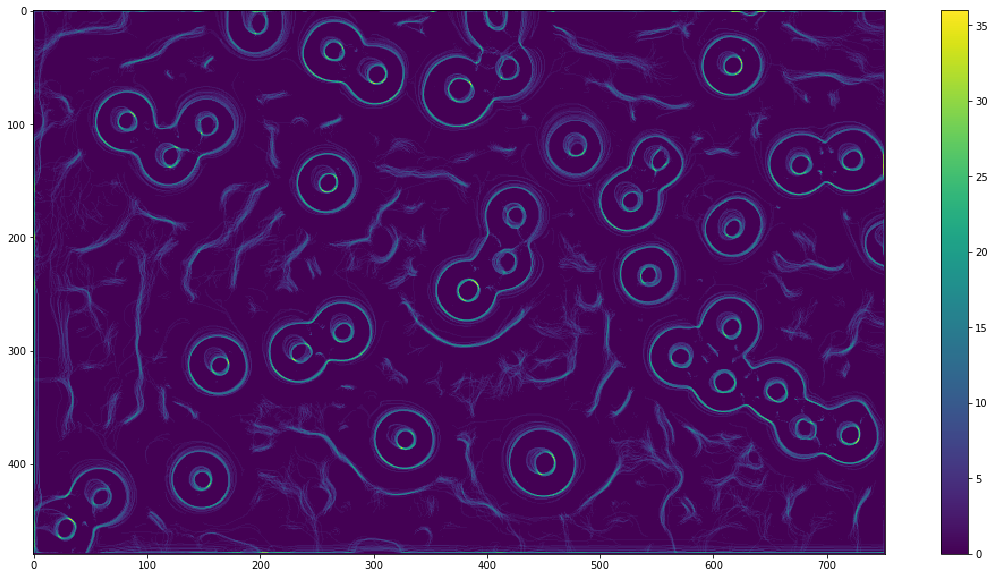

In [253]:
npzfile = np.load(folder_name + '\\aligned_image_stack.npz')

aimstack = npzfile['image_stack']

n, nj, nk = aimstack.shape

aedstack = np.zeros((n, nj, nk))

for i in range(n):
    aedstack[i] = canny(aimstack[i], sigma=8) # , sigma=3, low_threshold=9, high_threshold=10
    
plt.figure(figsize=(20,10))
plt.imshow(np.sum(aedstack, axis=0))
plt.colorbar()
plt.show()

In [268]:
folder_name = directory_name + '\\' + folder_name_list[9]
npzfile = np.load(folder_name + '\\aligned_image_stack.npz')
aligned_image_stack = npzfile['image_stack']

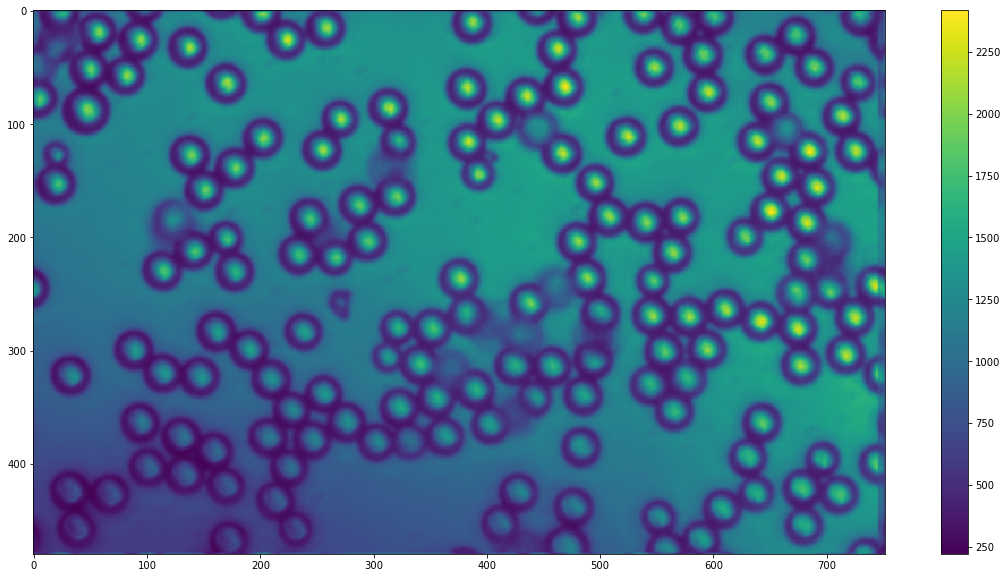

In [269]:
plt.figure(figsize=(20,10))
plt.imshow(np.sum(aligned_image_stack, axis=0))
plt.colorbar()
plt.show()

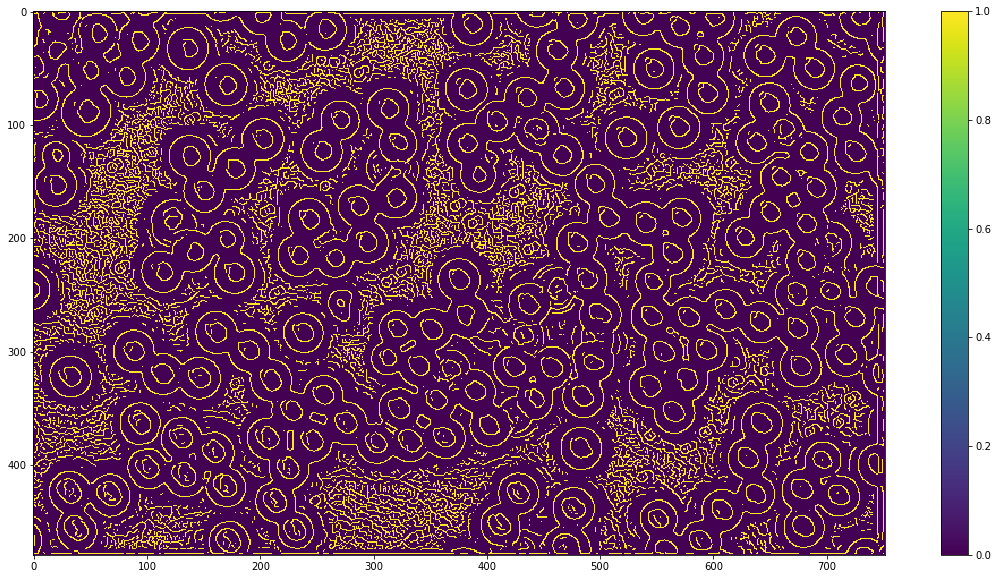

In [270]:
plt.figure(figsize=(20,10))
plt.imshow(canny(np.sum(aligned_image_stack, axis=0), sigma=1))
plt.colorbar()
plt.show()

In [271]:
plt.imsave(folder_name + '\\summed_edges.png', canny(np.sum(aligned_image_stack, axis=0), sigma=1))
plt.imsave(folder_name + '\\summed_image.png', np.sum(aligned_image_stack, axis=0))

In [272]:
folder_name = directory_name + '\\' + folder_name_list[6]
npzfile = np.load(folder_name + '\\aligned_image_stack.npz')
aligned_image_stack = npzfile['image_stack']
plt.imsave(folder_name + '\\summed_edges_10.png', canny(np.sum(aligned_image_stack, axis=0), sigma=10))

folder_name = directory_name + '\\' + folder_name_list[7]
npzfile = np.load(folder_name + '\\aligned_image_stack.npz')
aligned_image_stack = npzfile['image_stack']
plt.imsave(folder_name + '\\summed_edges_10.png', canny(np.sum(aligned_image_stack, axis=0), sigma=10))

In [281]:
folder_name = directory_name + '\\' + folder_name_list[6]
background = np.array(misc.imread(folder_name + '\\summed_edges_10.png', flatten=True), dtype=bool)
sphere_loc = np.array(255 - misc.imread(folder_name + '\\summed_image_edges.png', flatten=True), dtype=bool)
np.savez(folder_name + '\\sphere_locations', spheres=sphere_loc, background=background)

folder_name = directory_name + '\\' + folder_name_list[7]
background = np.array(misc.imread(folder_name + '\\summed_edges_10.png', flatten=True), dtype=bool)
sphere_loc = np.array(misc.imread(folder_name + '\\summed_image_edges.png', flatten=True), dtype=bool)
np.savez(folder_name + '\\sphere_locations', spheres=sphere_loc, background=background)

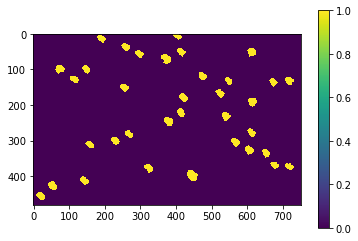

In [280]:
plt.figure()
plt.imshow(sphere_loc)
plt.colorbar()
plt.show()

In [282]:
210 / 748.356

0.2806151083174318

In [283]:
200. / 714.001

0.2801116525046884

In [284]:
748.356 + 714.001

1462.357

# Another thing to do: repurpose old images taken with a lower angle for the simple sinusoid analysis!

In [168]:
directory_name = r"C:\Users\Sumita\Documents\Research\Microspheres\birefringent measurements\sphere images\before 2019"

npzfile_names = ['\\glass 10X 3-9-18\\aligned\\image_stack.npz',
                 '\\vaterite 40X 3-9-18\\aligned\\\with plt\\image_stack.npz']

for fname in npzfile_names:
    npzfile = np.load(directory_name + fname)
    image_stack = npzfile['image_stack']
    radians = (npzfile['beta_radians'] - npzfile['alpha_radians']) % 180.
    degrees = np.array(radians * 180. / np.pi, dtype=int)
    np.savez(directory_name + fname[:fname.find('\\', 1)] + '\\aligned_image_stack',
             image_stack=image_stack, radians=radians, degrees=degrees)

In [13]:
from os import listdir
listdir(r'C:\Users\Sumita\Documents\Research\Microspheres\birefringent measurements\sphere images\2019-05-09')

['alumina_birefringence',
 'corpuscular_silica_15um_birefringence',
 'corpuscular_silica_15um_birefringence_2',
 'gadi_vaterite_birefringence',
 'gadi_vaterite_birefringence_2',
 'german_11um_vaterite_birefringence',
 'german_22um_silica_birefringence',
 'german_8um_vaterite_birefringence',
 'german_8um_vaterite_birefringence_2',
 'ruler_40X_1070nm.png']